# Setup

## Import libraries

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Import the Dataset

In [2]:
# Import the dataset
df = pd.read_csv('exported_df/complete_dataset.csv')

# Check the result
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,wind_gustdir_complete,wind_gustspeed_complete
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,4.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,19.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,7.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,W,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,...,NaN,NaN,E,31.0,ESE,E,15.0,13.0,E,31.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,...,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,E,31.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,NNW,22.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,N,37.0


### Create a Backup Dataframe

In [3]:
# Backup
df_bkp = df.copy()

## Final Raw Dataset - Melbourne Airpot

In [4]:
# Filter the dataset
df_ma = df.query('location == "MelbourneAirport"').reset_index(drop=True)

# Check the dataset
df_ma

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,wind_gustdir_complete,wind_gustspeed_complete
0,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,55.0,37.0,1005.1,...,33.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,SW,69.0
1,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,50.0,43.0,1018.0,...,31.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,SSE,56.0
2,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,51.0,35.0,1020.8,...,13.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,SSE,31.0
3,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,67.0,23.0,1016.2,...,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,SSE,35.0
4,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,51.0,31.0,1011.9,...,9.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,SE,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2017-06-21,MelbourneAirport,7.7,13.2,0.2,0.6,0.0,97.0,78.0,1029.1,...,NaN,NaN,N,37.0,W,S,9.0,13.0,N,37.0
3005,2017-06-22,MelbourneAirport,2.4,13.0,0.0,0.6,0.0,78.0,60.0,1028.6,...,NaN,NaN,N,39.0,N,N,17.0,19.0,N,39.0
3006,2017-06-23,MelbourneAirport,5.5,13.2,0.0,1.6,6.0,68.0,66.0,1018.7,...,NaN,NaN,N,57.0,NNW,N,19.0,35.0,N,57.0
3007,2017-06-24,MelbourneAirport,5.7,12.6,1.2,1.8,5.6,80.0,50.0,1018.9,...,NaN,NaN,SW,33.0,W,W,17.0,7.0,SW,33.0


### Create a Backup Dataframe

In [5]:
df_ma_bkp = df_ma.copy()

# Data Cleaning and Manipulation

## Select Desired Columns

In [6]:
# Features
df_ma.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'wind_gustdir', 'wind_gustspeed',
       'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'wind_gustdir_complete',
       'wind_gustspeed_complete'],
      dtype='object')

In [7]:
# Desired Columns
columns = ['raintoday', 'raintomorrow', 'mintemp', 'maxtemp', 'temp', 'rainfall', 'humidity', 'evaporation', 
           'sunshine', 'wind_gustspeed_complete']

# Filter the dataset
df_baseline = df_ma[columns]

# Check the result
df_baseline

,raintoday,raintomorrow,mintemp,maxtemp,temp,rainfall,humidity,evaporation,sunshine,wind_gustspeed_complete
0,No,Yes,11.2,19.9,25.880000,0.0,46.4,5.6,8.8,69.0
1,Yes,No,7.8,17.8,23.360000,1.2,53.6,7.2,12.9,56.0
2,No,No,6.3,21.1,2.705801,0.0,44.0,6.2,10.5,31.0
3,No,No,8.1,29.2,37.040000,0.0,29.6,6.4,12.5,35.0
4,No,No,9.7,29.0,36.800000,0.0,39.2,7.4,12.3,33.0
...,...,...,...,...,...,...,...,...,...,...
3004,No,No,7.7,13.2,17.840000,0.2,95.6,0.6,0.0,37.0
3005,No,No,2.4,13.0,17.600000,0.0,74.0,0.6,0.0,39.0
3006,No,Yes,5.5,13.2,17.840000,0.0,81.2,1.6,6.0,57.0
3007,Yes,No,5.7,12.6,17.120000,1.2,62.0,1.8,5.6,33.0


In [8]:
# Check the dataset's metadata
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raintoday                3009 non-null   object 
 1   raintomorrow             3009 non-null   object 
 2   mintemp                  3009 non-null   float64
 3   maxtemp                  3009 non-null   float64
 4   temp                     3009 non-null   float64
 5   rainfall                 3009 non-null   float64
 6   humidity                 3000 non-null   float64
 7   evaporation              3006 non-null   float64
 8   sunshine                 3008 non-null   float64
 9   wind_gustspeed_complete  2994 non-null   float64
dtypes: float64(8), object(2)
memory usage: 235.2+ KB


In [9]:
# Check missing values
df_baseline.isna().sum().sort_values(ascending=False)

wind_gustspeed_complete    15
humidity                    9
evaporation                 3
sunshine                    1
rainfall                    0
temp                        0
maxtemp                     0
mintemp                     0
raintomorrow                0
raintoday                   0
dtype: int64

In [10]:
# Dataframe without missing values
df_baseline = df_baseline[~(df_baseline.wind_gustspeed_complete.isna()) & ~(df_baseline.humidity.isna()) & ~(df_baseline.evaporation.isna()) & ~(df_baseline.sunshine.isna())]

# Check the result
df_baseline

,raintoday,raintomorrow,mintemp,maxtemp,temp,rainfall,humidity,evaporation,sunshine,wind_gustspeed_complete
0,No,Yes,11.2,19.9,25.880000,0.0,46.4,5.6,8.8,69.0
1,Yes,No,7.8,17.8,23.360000,1.2,53.6,7.2,12.9,56.0
2,No,No,6.3,21.1,2.705801,0.0,44.0,6.2,10.5,31.0
3,No,No,8.1,29.2,37.040000,0.0,29.6,6.4,12.5,35.0
4,No,No,9.7,29.0,36.800000,0.0,39.2,7.4,12.3,33.0
...,...,...,...,...,...,...,...,...,...,...
3004,No,No,7.7,13.2,17.840000,0.2,95.6,0.6,0.0,37.0
3005,No,No,2.4,13.0,17.600000,0.0,74.0,0.6,0.0,39.0
3006,No,Yes,5.5,13.2,17.840000,0.0,81.2,1.6,6.0,57.0
3007,Yes,No,5.7,12.6,17.120000,1.2,62.0,1.8,5.6,33.0


## Encode Categorical Variables

### `raintoday`

In [11]:
# Check the unique values
df_ma.raintoday.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# Encode this variable
df_baseline['raintoday_int'] = df_ma.raintoday.apply(lambda x : 1 if x == 'Yes' else 0)

# Check the result
df_baseline

<ipython-input-12-c0e6df817c6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['raintoday_int'] = df_ma.raintoday.apply(lambda x : 1 if x == 'Yes' else 0)


,raintoday,raintomorrow,mintemp,maxtemp,temp,rainfall,humidity,evaporation,sunshine,wind_gustspeed_complete,raintoday_int
0,No,Yes,11.2,19.9,25.880000,0.0,46.4,5.6,8.8,69.0,0
1,Yes,No,7.8,17.8,23.360000,1.2,53.6,7.2,12.9,56.0,1
2,No,No,6.3,21.1,2.705801,0.0,44.0,6.2,10.5,31.0,0
3,No,No,8.1,29.2,37.040000,0.0,29.6,6.4,12.5,35.0,0
4,No,No,9.7,29.0,36.800000,0.0,39.2,7.4,12.3,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3004,No,No,7.7,13.2,17.840000,0.2,95.6,0.6,0.0,37.0,0
3005,No,No,2.4,13.0,17.600000,0.0,74.0,0.6,0.0,39.0,0
3006,No,Yes,5.5,13.2,17.840000,0.0,81.2,1.6,6.0,57.0,0
3007,Yes,No,5.7,12.6,17.120000,1.2,62.0,1.8,5.6,33.0,1


### `raintomorrow`

In [13]:
# Check the unique values
df_ma.raintomorrow.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
# Encode this variable
df_baseline['raintomorrow_int'] = df_ma.raintomorrow.apply(lambda x : 1 if x == 'Yes' else 0)

# Check the result
df_baseline

<ipython-input-14-244e3a06b7a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['raintomorrow_int'] = df_ma.raintomorrow.apply(lambda x : 1 if x == 'Yes' else 0)


,raintoday,raintomorrow,mintemp,maxtemp,temp,rainfall,humidity,evaporation,sunshine,wind_gustspeed_complete,raintoday_int,raintomorrow_int
0,No,Yes,11.2,19.9,25.880000,0.0,46.4,5.6,8.8,69.0,0,1
1,Yes,No,7.8,17.8,23.360000,1.2,53.6,7.2,12.9,56.0,1,0
2,No,No,6.3,21.1,2.705801,0.0,44.0,6.2,10.5,31.0,0,0
3,No,No,8.1,29.2,37.040000,0.0,29.6,6.4,12.5,35.0,0,0
4,No,No,9.7,29.0,36.800000,0.0,39.2,7.4,12.3,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3004,No,No,7.7,13.2,17.840000,0.2,95.6,0.6,0.0,37.0,0,0
3005,No,No,2.4,13.0,17.600000,0.0,74.0,0.6,0.0,39.0,0,0
3006,No,Yes,5.5,13.2,17.840000,0.0,81.2,1.6,6.0,57.0,0,1
3007,Yes,No,5.7,12.6,17.120000,1.2,62.0,1.8,5.6,33.0,1,0


In [15]:
df_baseline.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,2981.0,9.939416,4.471133,-1.000000,6.70,9.50,13.00,30.50
maxtemp,2981.0,20.444884,6.621536,8.400000,15.30,19.10,24.50,46.80
temp,2981.0,25.294240,9.424258,2.002276,19.64,24.44,30.92,58.16
rainfall,2981.0,1.441999,4.551988,0.000000,0.00,0.00,0.80,75.80
humidity,2981.0,61.660781,23.560577,2.001612,48.80,60.80,76.40,119.60
evaporation,2981.0,4.630325,3.333527,0.000000,2.20,4.00,6.40,23.80
sunshine,2981.0,6.381114,3.910494,0.000000,3.00,6.50,9.60,13.90
wind_gustspeed_complete,2981.0,46.920161,16.078634,15.000000,35.00,44.00,57.00,122.00
raintoday_int,2981.0,0.217712,0.412760,0.000000,0.00,0.00,0.00,1.00
raintomorrow_int,2981.0,0.216035,0.411607,0.000000,0.00,0.00,0.00,1.00


## Create Variables for the Model

### Filter the Dataset

In [21]:
# Necessary Variable
columns = ['raintoday_int', 'mintemp', 'maxtemp', 'temp', 'rainfall', 'humidity', 'evaporation', 
           'sunshine', 'wind_gustspeed_complete']

# Filter the dataset
X = df_baseline[columns]
y = df_baseline['raintomorrow_int']

# Holdout

We are going to use **80%** of the dataset to **train** the model and **20%** to **test** it.

In [22]:
# Split the dataset into trainnig and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

# Pipeline

## Preprocessing

In [23]:
# Create the pipeline
modeling = Pipeline(steps=[('scaler', StandardScaler()),
                           ('logistic', LogisticRegression())], verbose=True)

In [24]:
modeling.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing logistic, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())],
         verbose=True)

In [25]:
modeling.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [27]:
modeling.score(X=X_train, y=y_train)

0.8330536912751678

In [28]:
modeling.score(X=X_test, y=y_test)

0.830820770519263

In [30]:
precision_score(y_true=y_train, y_pred=modeling.predict(X_train))

0.708185053380783

In [31]:
precision_score(y_true=y_test, y_pred=modeling.predict(X_test))

0.6842105263157895

In [32]:
recall_score(y_true=y_train, y_pred=modeling.predict(X_train))

0.3864077669902913

In [33]:
recall_score(y_true=y_test, y_pred=modeling.predict(X_test))

0.40310077519379844

In [55]:
tree_baseline = DecisionTreeClassifier(max_depth=3, random_state=42)

In [56]:
tree_baseline.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

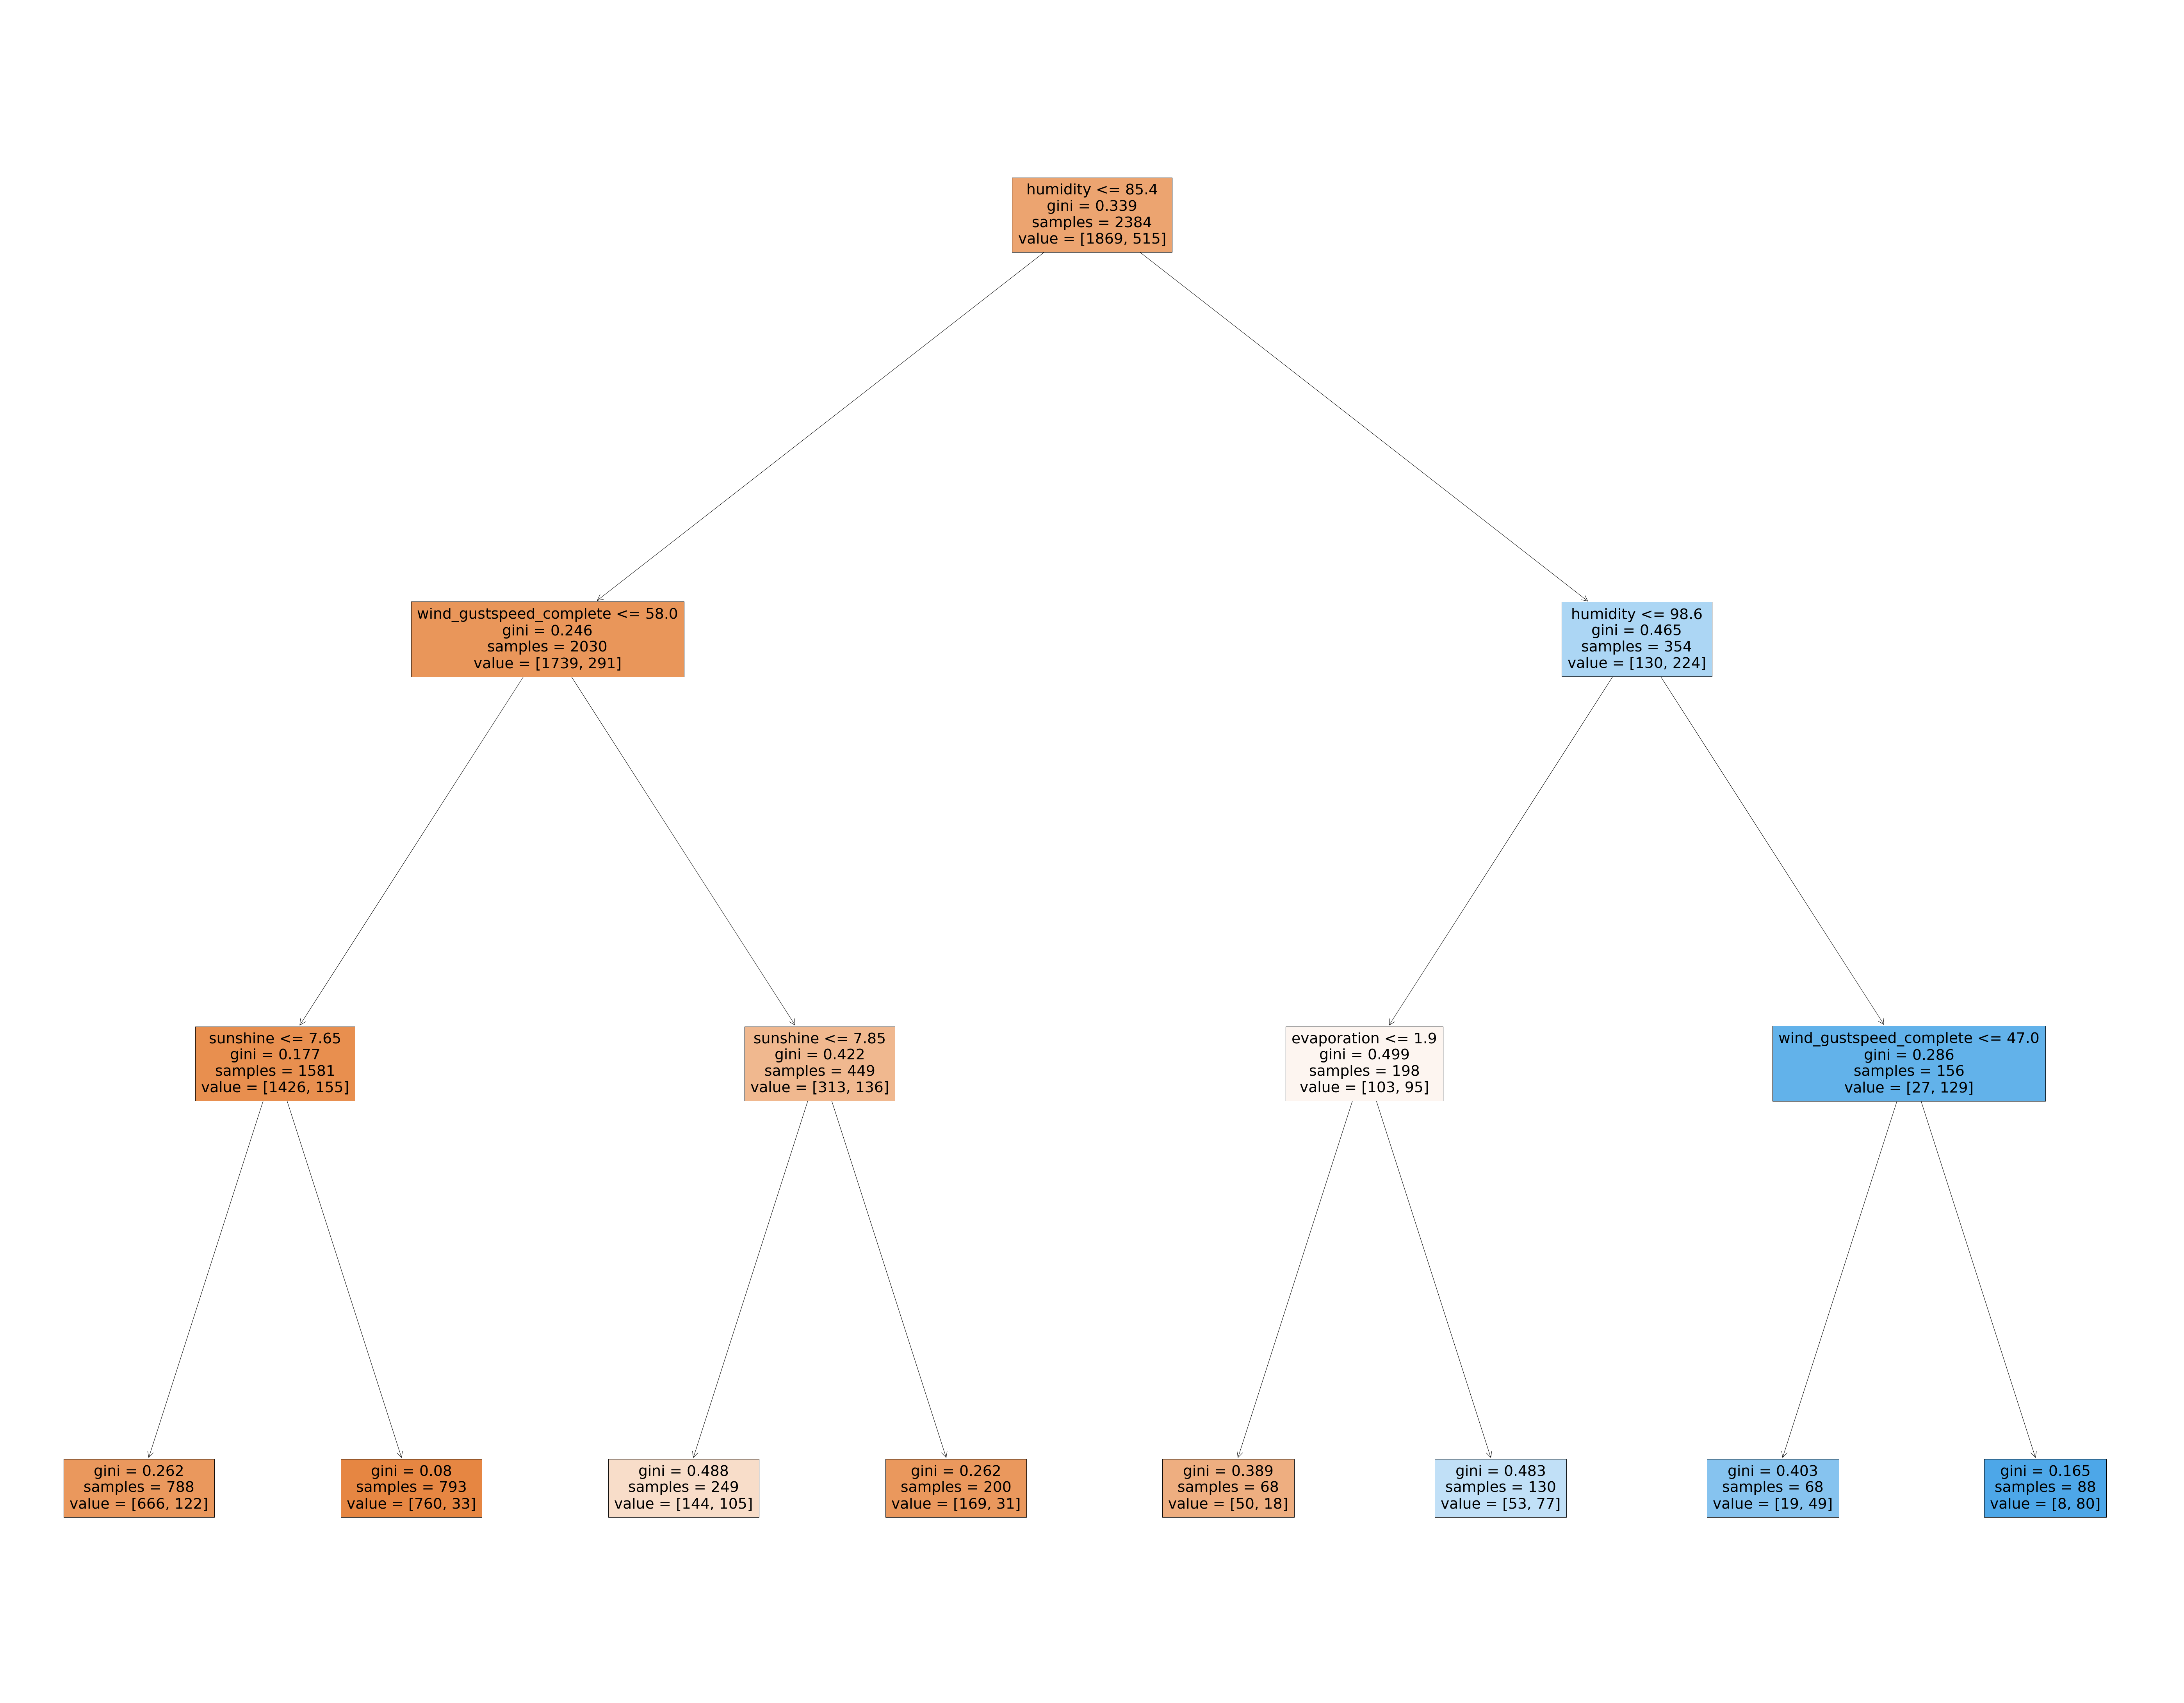

In [57]:
fig, ax = plt.subplots(figsize=(100,80))
plot_tree(decision_tree=tree_baseline, feature_names=X_train.columns, filled=True);

# Baseline